In [127]:
# Data Manipulation Libraries
import pandas as pd 

# Data Visualization Libraries 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings

# Machine Learning Libraries 
from mlxtend.plotting import plot_decision_regions 
from sklearn.model_selection import train_test_split

# Others
sns.set_style("darkgrid")
warnings.filterwarnings("ignore")

## Data Collection

In [129]:
df = pd.read_csv(r"H:\Programming\Dataset\Machine Learning\Placement (1).csv")
df.head(3)

,Student_ID,CGPA,IQ,Placement
0,1,6.8,123,1
1,2,5.9,106,0
2,3,5.3,121,0


## Data Understanding

In [131]:
def check(self): 
    print("\nShape:")
    print(self.shape)
    print("\nData Types:")
    print(self.info())
    print("\nCheck NaN:")
    print(self.isnull().sum())
    print("\nCheck NaN as Percentage:")
    print((self.isnull().sum()/len(self))*100)
    print("\nOverall NaN valu as Percentage:")
    print(self.isnull().sum().sum()/(self.shape[0]*self.shape[1])*100)
    print("\nCheck Duplicates:")
    print(self.duplicated().sum())

check(df)


Shape:
(100, 4)

Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Student_ID  100 non-null    int64  
 1   CGPA        100 non-null    float64
 2   IQ          100 non-null    int64  
 3   Placement   100 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 3.3 KB
None

Check NaN:
Student_ID    0
CGPA          0
IQ            0
Placement     0
dtype: int64

Check NaN as Percentage:
Student_ID    0.0
CGPA          0.0
IQ            0.0
Placement     0.0
dtype: float64

Overall NaN valu as Percentage:
0.0

Check Duplicates:
0


## Data Cleaning

In [133]:
df.drop(columns="Student_ID", inplace=True) 
df.head(3)

,CGPA,IQ,Placement
0,6.8,123,1
1,5.9,106,0
2,5.3,121,0


## Data Visualization 

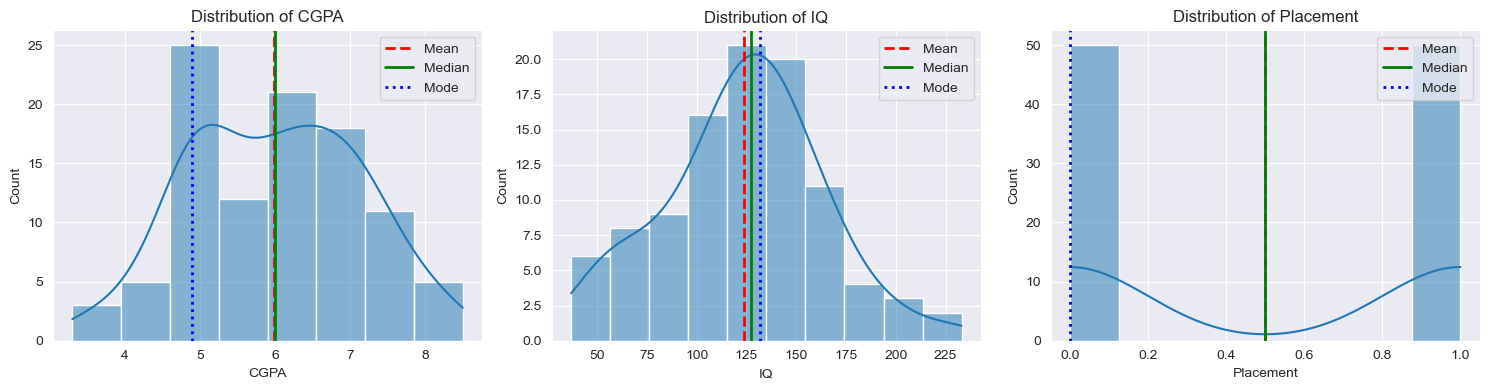

In [135]:
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Number of charts per row
n_cols = 3

# Calculate required number of rows
n_rows = math.ceil(len(df.columns) / n_cols)

# Create subplots grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

# Plot each column on its subplot
for i, col in enumerate(df.columns):

    # Drop missing values
    data = df[col].dropna()

    # Plot histogram
    sns.histplot(data, ax=axes[i], kde=True)

    # Calculate statistics
    mean_val = data.mean()
    median_val = data.median()
    mode_val = data.mode()[0]   # first mode

    # Add vertical lines
    axes[i].axvline(mean_val, linestyle='--', linewidth=2, label='Mean', color='red')
    axes[i].axvline(median_val, linestyle='-', linewidth=2, label='Median', color='green')
    axes[i].axvline(mode_val, linestyle=':', linewidth=2, label='Mode', color='blue')

    # Titles & legend
    axes[i].set_title(f"Distribution of {col}")
    axes[i].legend()

# Hide unused axes
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.savefig('his.png')
plt.show()


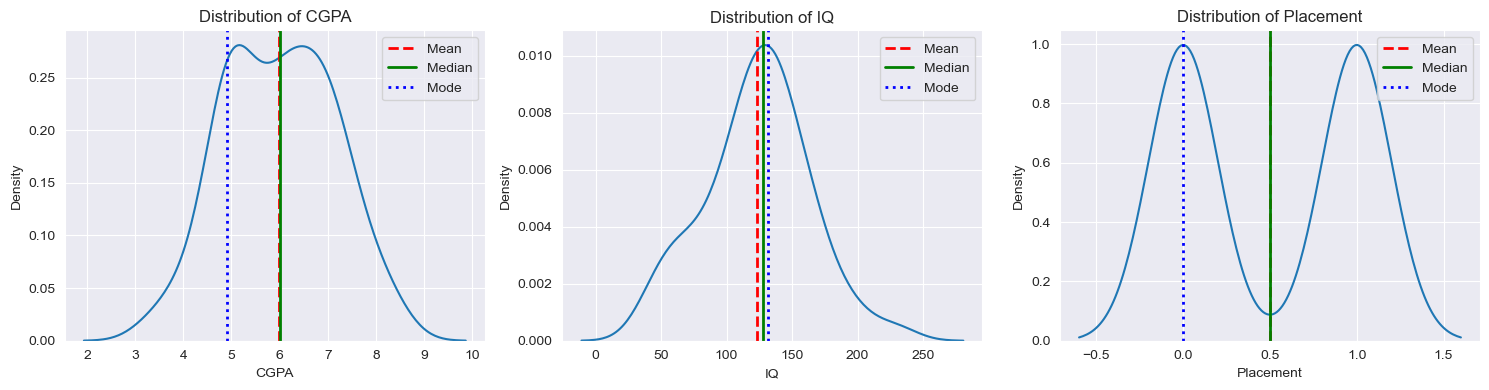

In [136]:
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Number of charts per row
n_cols = 3

# Calculate required number of rows
n_rows = math.ceil(len(df.columns) / n_cols)

# Create subplots grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

# Plot each column on its subplot
for i, col in enumerate(df.columns):

    # Drop missing values
    data = df[col].dropna()

    # Plot histogram
    sns.kdeplot(df[col], ax=axes[i])

    # Calculate statistics
    mean_val = data.mean()
    median_val = data.median()
    mode_val = data.mode()[0]   # first mode

    # Add vertical lines
    axes[i].axvline(mean_val, linestyle='--', linewidth=2, label='Mean', color='red')
    axes[i].axvline(median_val, linestyle='-', linewidth=2, label='Median', color='green')
    axes[i].axvline(mode_val, linestyle=':', linewidth=2, label='Mode', color='blue')

    # Titles & legend
    axes[i].set_title(f"Distribution of {col}")
    axes[i].legend()

# Hide unused axes
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


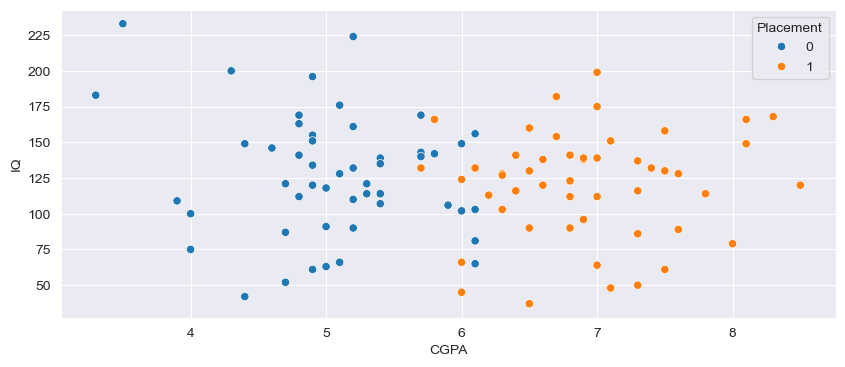

In [195]:
plt.figure(figsize=(10,4))
sns.scatterplot(x='CGPA', y="IQ",data=df, hue="Placement")
plt.show()

## Modeling

In [139]:
x = df.iloc[:, :-1]
y = df['Placement']

In [140]:
x_tarin, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)


In [141]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

## *GaussianNB*

In [142]:
gnb = GaussianNB()
gnb.fit(x_tarin, y_train)

GaussianNB()

In [205]:
gnb.score(x_test, y_test)*100

95.0

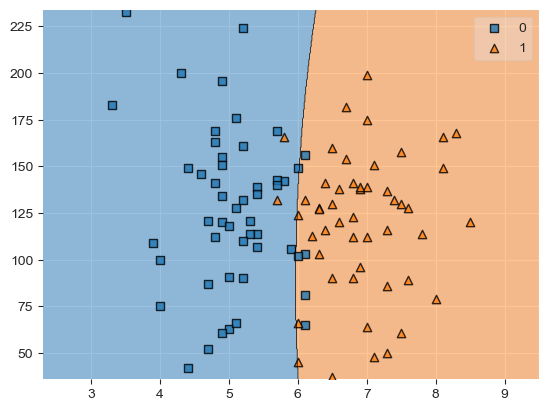

In [144]:
plot_decision_regions(x.to_numpy(), y.to_numpy(),clf=gnb)
plt.show()

## *MultinomialNB*

In [145]:
mnb = MultinomialNB()
mnb.fit(x_tarin, y_train)

MultinomialNB()

In [207]:
mnb.score(x_test, y_test)*100

75.0

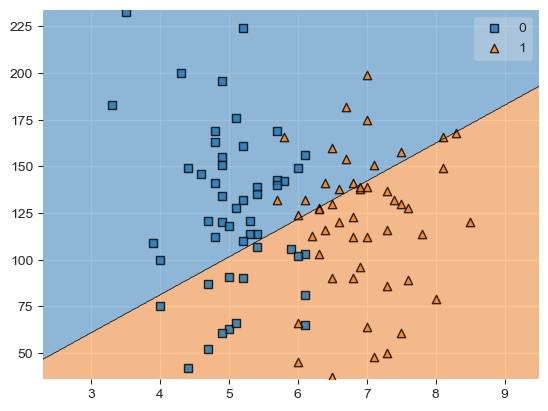

In [147]:
plot_decision_regions(x.to_numpy(), y.to_numpy(),clf=mnb)
plt.show()

## *BernoulliNB*

In [148]:
bnb = BernoulliNB()
bnb.fit(x_tarin, y_train)

BernoulliNB()

In [209]:
bnb.score(x_test, y_test)*100

50.0

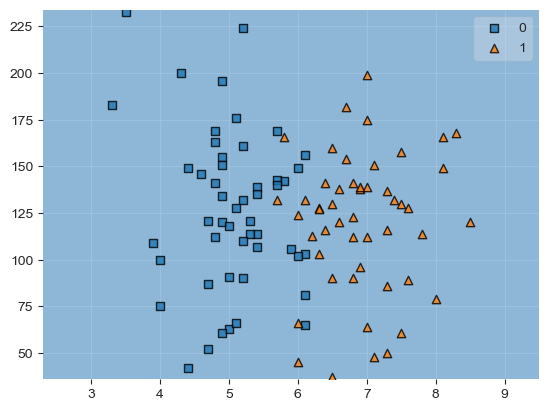

In [150]:
plot_decision_regions(x.to_numpy(), y.to_numpy(),clf=bnb)
plt.show()

In [151]:
df.columns

Index(['CGPA', 'IQ', 'Placement'], dtype='object')

# All in One

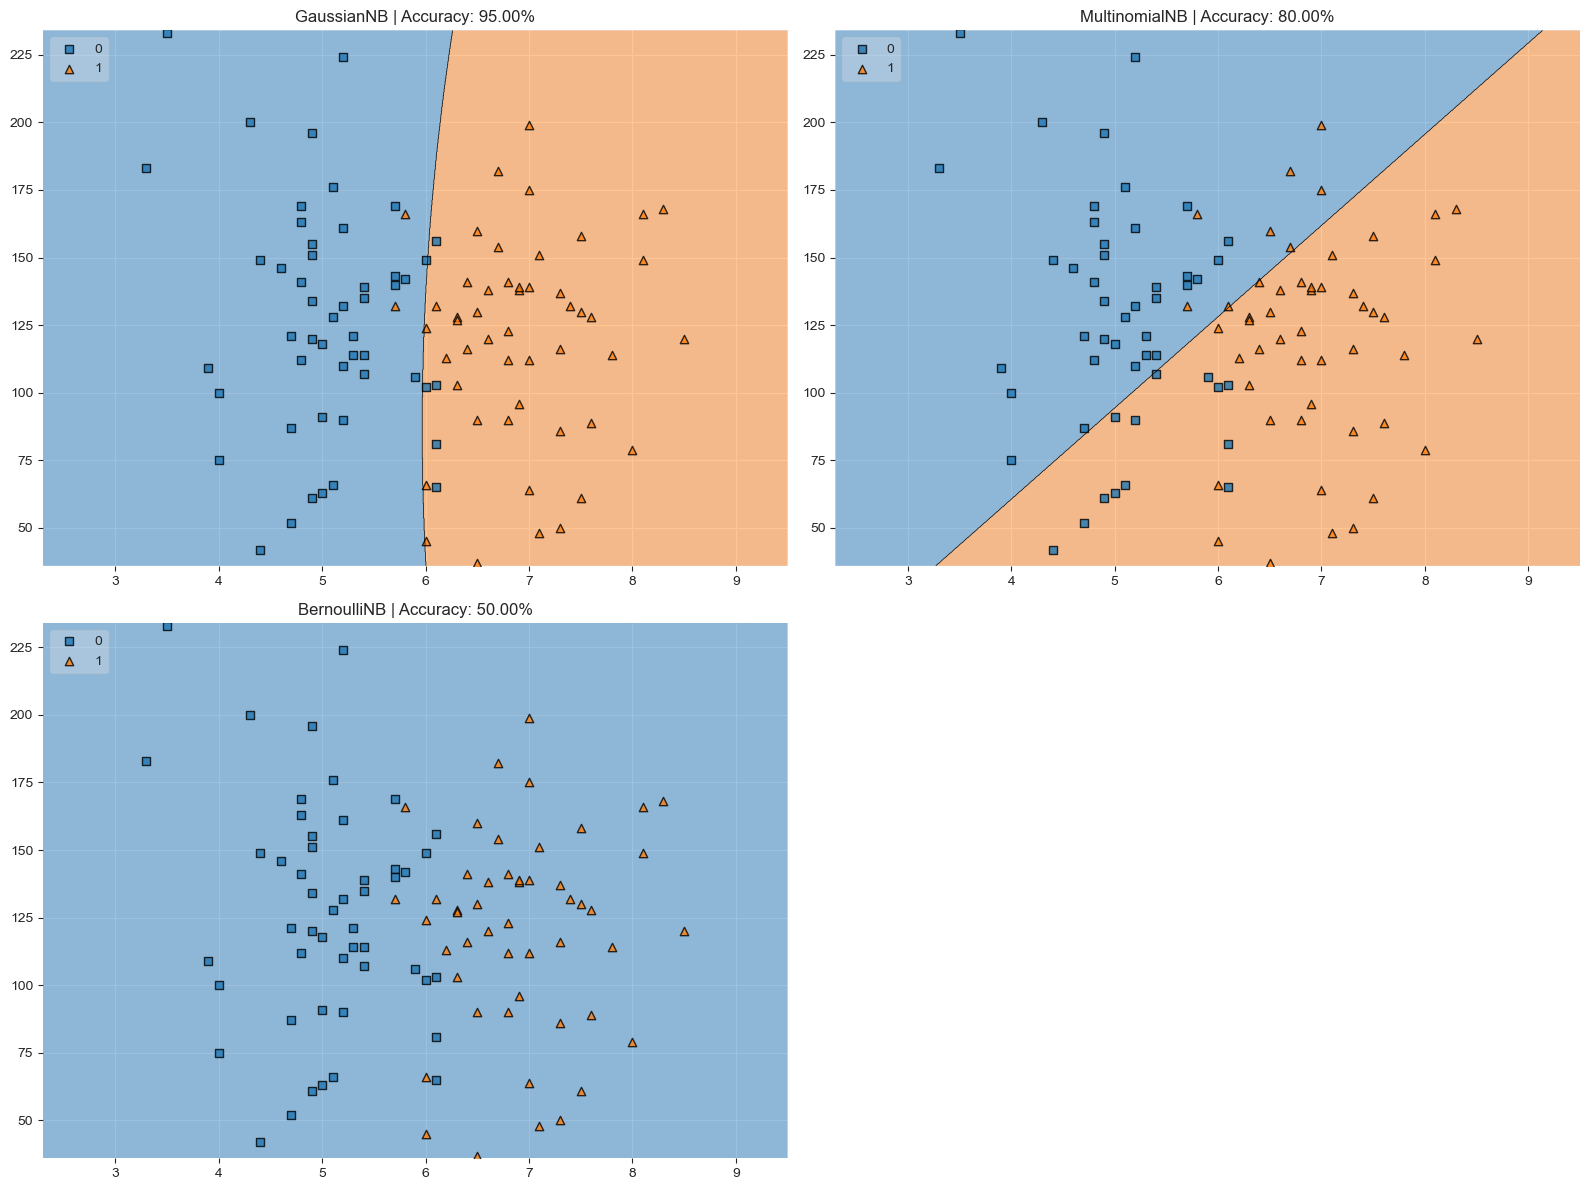

In [183]:
# ======================================================
# 1. IMPORT LIBRARIES
# ======================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, Binarizer

from sklearn.naive_bayes import (
    GaussianNB,
    MultinomialNB,
    BernoulliNB,
    CategoricalNB
)

from mlxtend.plotting import plot_decision_regions


# ======================================================
# 2. SELECT 2 FEATURES & TARGET
# ======================================================
X = df[['CGPA', 'IQ']]   # MUST be 2 features
y = df['Placement']                  # MUST be binary (0/1)

X = X.to_numpy()
y = y.to_numpy()


# ======================================================
# 3. TRAIN–TEST SPLIT
# ======================================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# ======================================================
# 4. PIPELINES FOR ALL NAIVE BAYES MODELS
# ======================================================
pipelines = {
    "GaussianNB": Pipeline([
        # GaussianNB does NOT need scaling
        ("model", GaussianNB())
    ]),

    "MultinomialNB": Pipeline([
        # MultinomialNB requires non-negative values
        ("scaler", MinMaxScaler()),
        ("model", MultinomialNB())
    ]),

    "BernoulliNB": Pipeline([
        # BernoulliNB requires binary features
        ("binarizer", Binarizer(threshold=0.5)),
        ("model", BernoulliNB())
    ]),

    # "CategoricalNB": Pipeline([
    #     # assumes already encoded categorical data
    #     ("model", CategoricalNB())
    # ])
}


# ======================================================
# 5. TRAIN, EVALUATE & PLOT DECISION REGIONS
# ======================================================
plt.figure(figsize=(16, 12))

for i, (name, pipe) in enumerate(pipelines.items(), 1):

    # Train pipeline
    pipe.fit(X_train, y_train)

    # Predict
    y_pred = pipe.predict(X_test)

    # Accuracy
    acc = accuracy_score(y_test, y_pred)

    # Plot decision regions
    plt.subplot(2, 2, i)
    plot_decision_regions(
        X=X,
        y=y,
        clf=pipe,
        legend=2
    )

    plt.title(f"{name} | Accuracy: {acc*100:.2f}%")

plt.tight_layout()
plt.savefig('nevy.png')
plt.show()
